### Import all required libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

### Read Dataset

In [10]:
df = pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Shape Of the Dataset

In [11]:
df.shape

(10841, 13)

### Check Information about the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###### All columns are object remaining Rating

### Check statical analysis

In [13]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Check Missing Value

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

###### The dataset has missing values

In [15]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

### Change the type of Reviews into int

In [16]:
df['Reviews'].astype(int)

ValueError: invalid literal for int() with base 10: '3.0M'

In [17]:
df['Reviews'].str.isnumeric().sum()

10840

In [18]:
len(df['Reviews'])

10841

In [19]:
index = df[df['Reviews']=='3.0M'].index[0]

In [20]:
df = df.drop(index,axis=0).reset_index(drop=True)

In [21]:
df['Reviews'] =  df['Reviews'].astype(int)

### Convert Reviews type object into int

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.0+ MB


### Convert Size object into Float

In [24]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [25]:
df['Size'] = df['Size'].str.replace("M","000")
df['Size']= df['Size'].str.replace("k","")

In [26]:
df['Size'].astype(float)

ValueError: could not convert string to float: 'Varies with device'

In [27]:
df['Size'].str.isnumeric().sum()

5536

In [28]:
df['Size'] = df['Size'].replace("Varies with device",np.nan)

In [29]:
df['Size'] = df['Size'].astype(float)

In [30]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.0+ MB


### Convert type Installs object into int

In [32]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [33]:
df['Installs'] = df['Installs'].str.replace(',','')
df['Installs'] = df['Installs'].str.replace('+','')

In [34]:
df['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [35]:
df['Installs']  = df['Installs'].astype(int)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(2), object(9)
memory usage: 1016.4+ KB


### Convert price object into float

In [37]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [38]:
df['Price'] = df['Price'].str.replace("$","")
df['Price'] = df['Price'].astype(float)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1016.4+ KB


In [40]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [41]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [42]:
df['Last Updated']

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10835       July 25, 2017
10836        July 6, 2018
10837    January 20, 2017
10838    January 19, 2015
10839       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

In [43]:
df['Month'] = df['Last Updated'].str.split(",").str[0].str.split(" ").str[0]

In [44]:
df['Date'] = df['Last Updated'].str.split(",").str[0].str.split(" ").str[1]

In [45]:
df['Year'] = df['Last Updated'].str.split(" ").str[2]

In [46]:
df.drop(['Last Updated'],axis=1,inplace=True)

In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Date,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,January,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,January,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,August,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,June,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,June,20,2018


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Month           10840 non-null  object 
 13  Date            10840 non-null  object 
 14  Year            10840 non-null  object 
dtypes: float64(3), int32(2), object(10)
memory usage: 1.2+ MB


In [49]:
df['Year'] = df['Year'].astype(int)
df['Date'] = df['Date'].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Month           10840 non-null  object 
 13  Date            10840 non-null  int32  
 14  Year            10840 non-null  int32  
dtypes: float64(3), int32(4), object(8)
memory usage: 1.1+ MB


In [51]:
df['Month'].unique()

array(['January', 'August', 'June', 'March', 'April', 'September', 'July',
       'October', 'November', 'May', 'December', 'February'], dtype=object)

In [52]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['_','January','February','March','April','May','June','July','August','September','October','November','December']])

In [53]:
df['Month'] = encoder.fit_transform(df[['Month']])

In [54]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Date,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,1.0,7,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,1.0,15,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,8.0,1,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,6.0,8,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,6.0,20,2018


In [55]:
df['Month'] = df['Month'].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Month           10840 non-null  int32  
 13  Date            10840 non-null  int32  
 14  Year            10840 non-null  int32  
dtypes: float64(3), int32(5), object(7)
memory usage: 1.0+ MB


In [57]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Date,Year
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,1.48,4.1 and up,7,25,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,1.0,4.1 and up,7,6,2018
10837,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,1.0,2.2 and up,1,20,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17+,Books & Reference,Varies with device,Varies with device,1,19,2015
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,Free,0.0,Everyone,Lifestyle,Varies with device,Varies with device,7,25,2018


### Check duplicates values

In [58]:
df.duplicated("App").sum()

1181

##### 1181 duplicates value present in the dataset

In [59]:
df = df.drop_duplicates(subset='App',keep="first").reset_index(drop=True)

In [60]:
df.shape

(9659, 15)

In [61]:
df.duplicated("App").sum()

0

### Divided Into numerical and categorical features 

In [62]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype!="O"]
categorical_feature = [feature for feature in df.columns if df[feature].dtype=="O"]


In [63]:
categorical_feature

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [64]:
numeric_feature

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Month', 'Date', 'Year']

# EDA

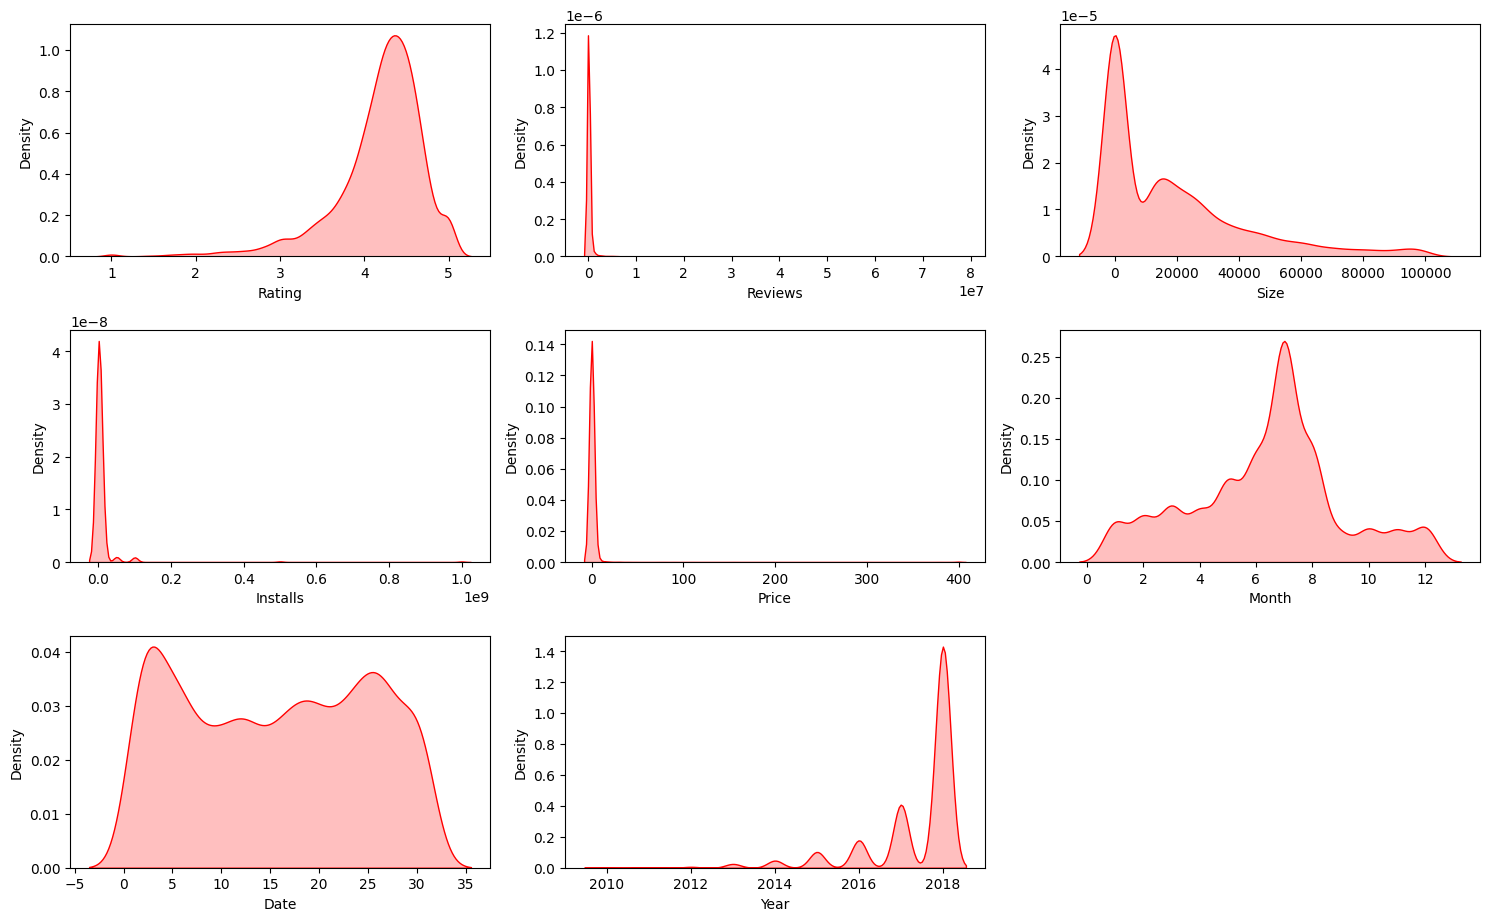

In [65]:
plt.figure(figsize=(15,15))

for i in range(0,len(numeric_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_feature[i]],shade=True,color='r')
    plt.xlabel(numeric_feature[i])
    plt.tight_layout()

## rating and year is left skewed and installs,price,reviews,size are right skewed 

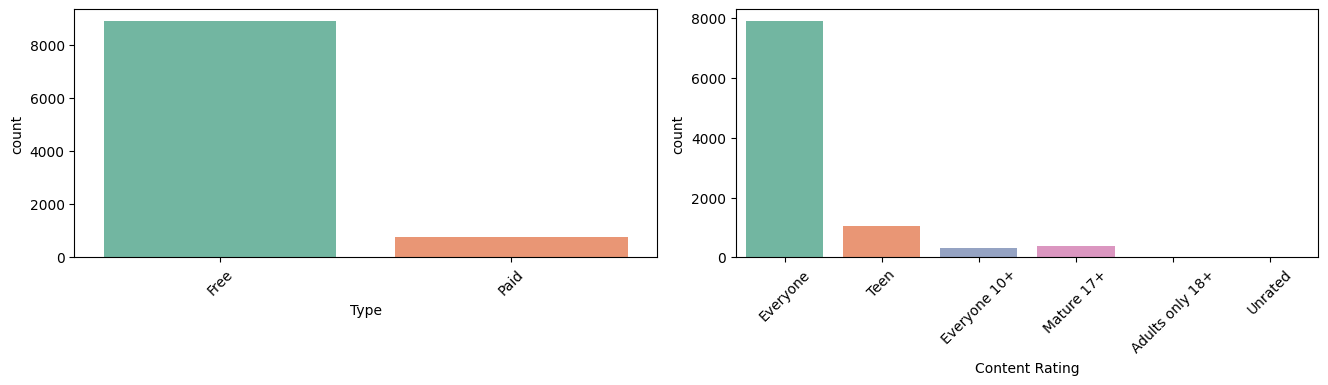

In [66]:
plt.figure(figsize=(20,18))

category = ['Type','Content Rating']
for i in range(0,len(category)):
    plt.subplot(5,3,i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [67]:
## Which is the most popular app category

<Axes: ylabel='count'>

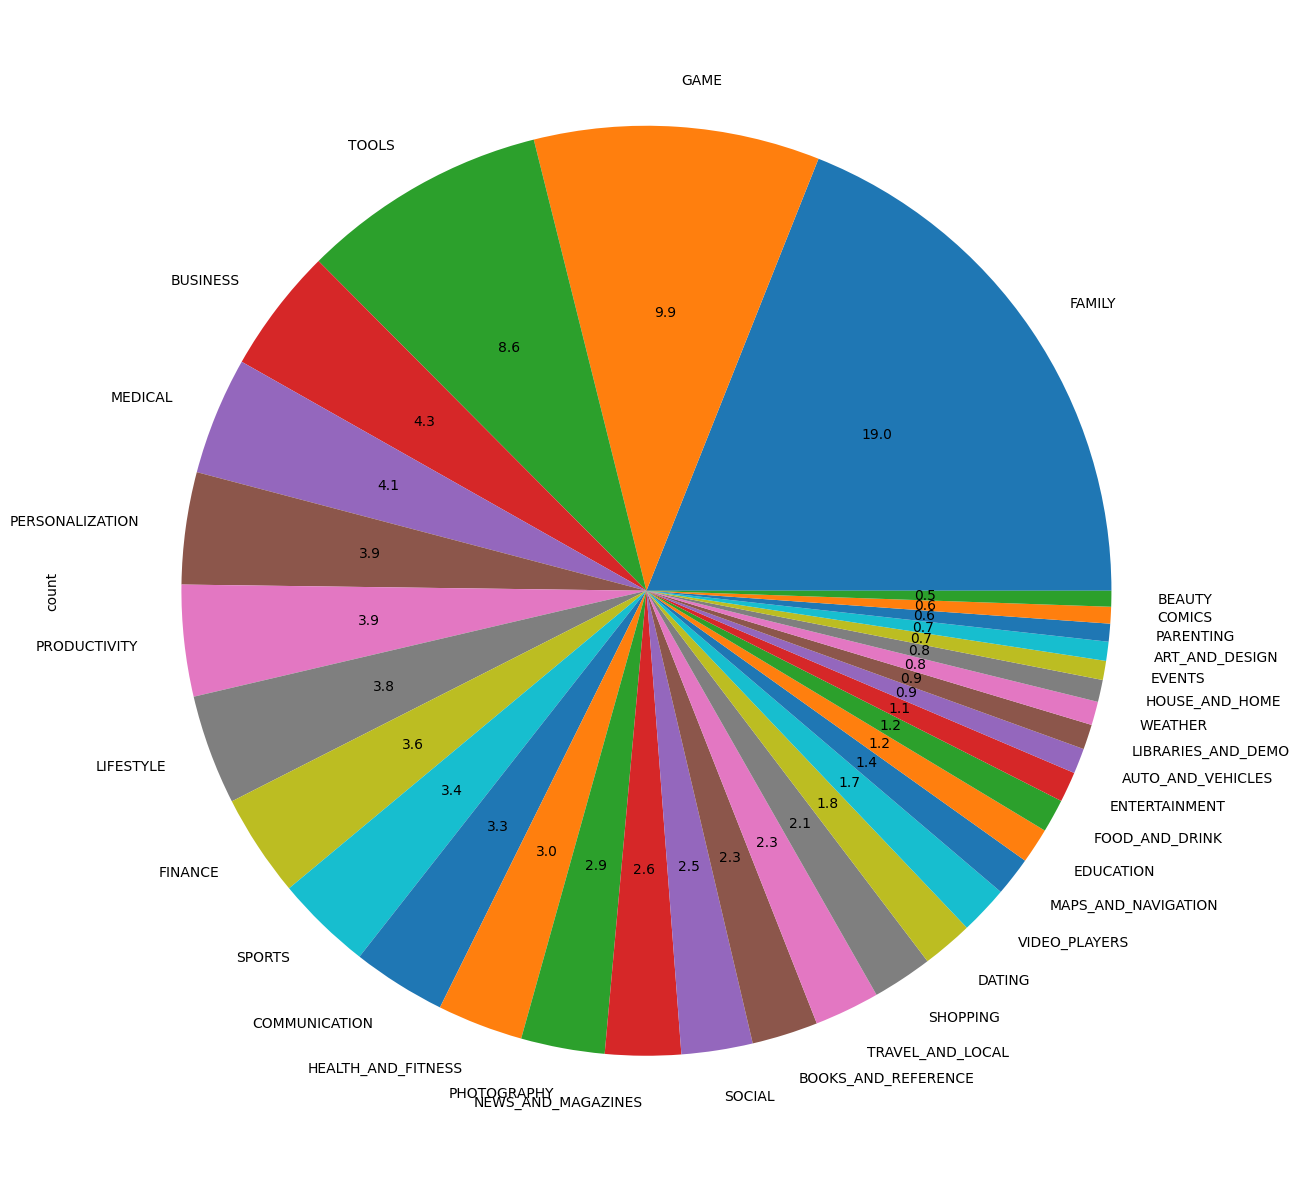

In [68]:
df['Category'].value_counts().plot.pie(y=df['Category'],figsize=(15,16),autopct="%1.1f")

#### Most popular app category Family,game, tool.
#### Less popular app category beauty,comics,parenting.

In [69]:
category = pd.DataFrame(df['Category'].value_counts())
category.rename(columns={'Category':"count"},inplace=True)

In [70]:
category.index[:10]

Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', 'MEDICAL', 'PERSONALIZATION',
       'PRODUCTIVITY', 'LIFESTYLE', 'FINANCE', 'SPORTS'],
      dtype='object', name='Category')

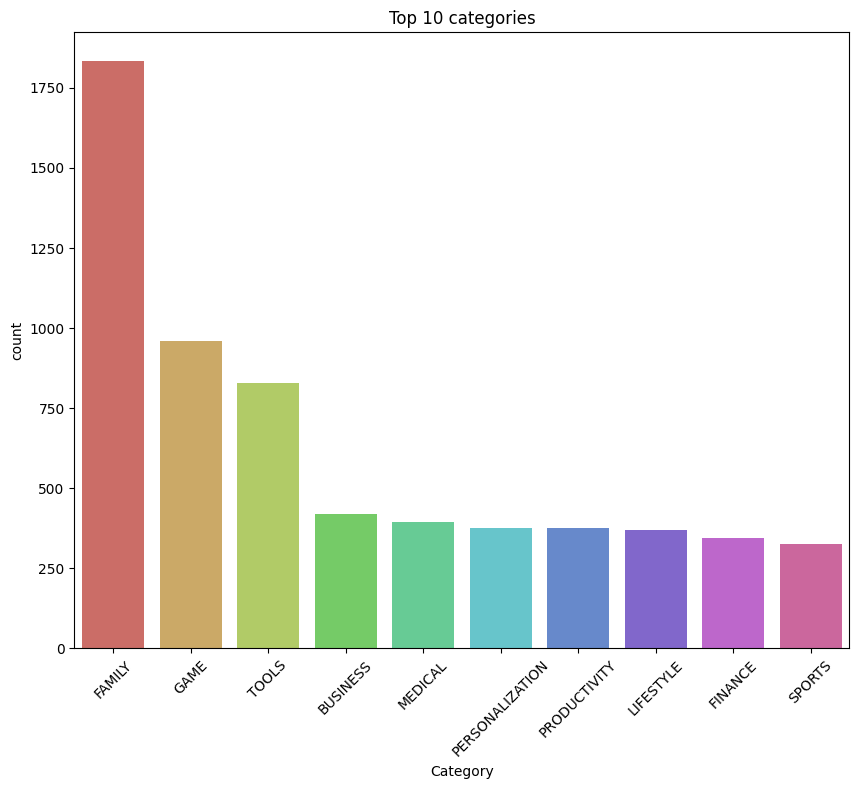

In [71]:

plt.figure(figsize=(10,8))
sns.barplot(x=category.index[:10],y="count",data=category[:10],palette='hls')
plt.title("Top 10 categories")
plt.xticks(rotation=45)
plt.show()

In [72]:
## Which category has largest number of installtation
## what are the top 5 most important all in each popular categories
## how many app are there on google play store which get 5 rating

In [82]:
category = df[df['Installs']==max(df['Installs'])]['Category']

In [121]:
new = df[df['Installs']==max(df['Installs'])][['Category','Installs']]

In [122]:
new

,Category,Installs
152,BOOKS_AND_REFERENCE,1000000000
299,COMMUNICATION,1000000000
300,COMMUNICATION,1000000000
302,COMMUNICATION,1000000000
304,COMMUNICATION,1000000000
305,COMMUNICATION,1000000000
349,COMMUNICATION,1000000000
701,ENTERTAINMENT,1000000000
1356,GAME,1000000000
2002,SOCIAL,1000000000


In [96]:
1000000000<50000000

False

In [114]:
new['Category'].values[0]

'BOOKS_AND_REFERENCE'

In [120]:
df[df['Rating']==5]['Category'].unique()

array(['COMICS', 'DATING', 'EVENTS', 'LIBRARIES_AND_DEMO', 'MEDICAL',
       'TOOLS', 'PERSONALIZATION', 'BOOKS_AND_REFERENCE', 'LIFESTYLE',
       'SOCIAL', 'BUSINESS', 'NEWS_AND_MAGAZINES', 'PHOTOGRAPHY',
       'SHOPPING', 'FAMILY', 'FOOD_AND_DRINK', 'GAME', 'TRAVEL_AND_LOCAL',
       'FINANCE', 'HEALTH_AND_FITNESS', 'COMMUNICATION', 'PRODUCTIVITY',
       'SPORTS', 'PARENTING', 'ART_AND_DESIGN'], dtype=object)

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

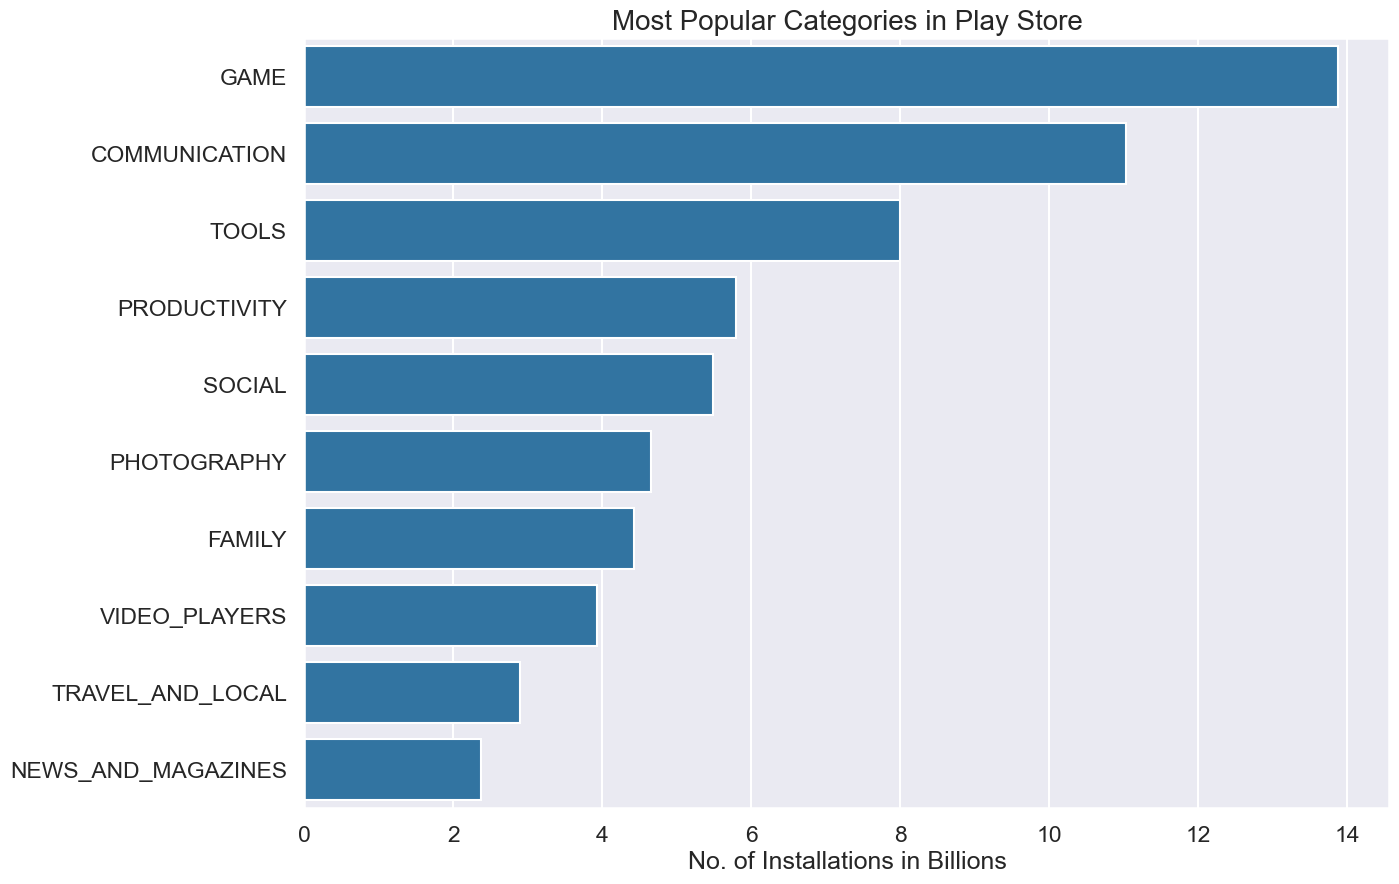

In [123]:
df_cat_installs = df.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()
df_cat_installs.Installs = df_cat_installs.Installs/1000000000# converting into billions
df2 = df_cat_installs.head(10)
plt.figure(figsize = (14,10))
sns.set_context("talk")
sns.set_style("darkgrid")
ax = sns.barplot(x = 'Installs' , y = 'Category' , data = df2 )
ax.set_xlabel('No. of Installations in Billions')
ax.set_ylabel('')
ax.set_title("Most Popular Categories in Play Store", size = 20)

In [136]:
d1 = df.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

In [138]:
d1.Installs = d1.Installs/1000000000

In [139]:
d1

,Category,Installs
0,GAME,13.878924
1,COMMUNICATION,11.038276
2,TOOLS,8.001772
3,PRODUCTIVITY,5.793091
4,SOCIAL,5.487868
5,PHOTOGRAPHY,4.649148
6,FAMILY,4.427942
7,VIDEO_PLAYERS,3.926903
8,TRAVEL_AND_LOCAL,2.894887
9,NEWS_AND_MAGAZINES,2.369218


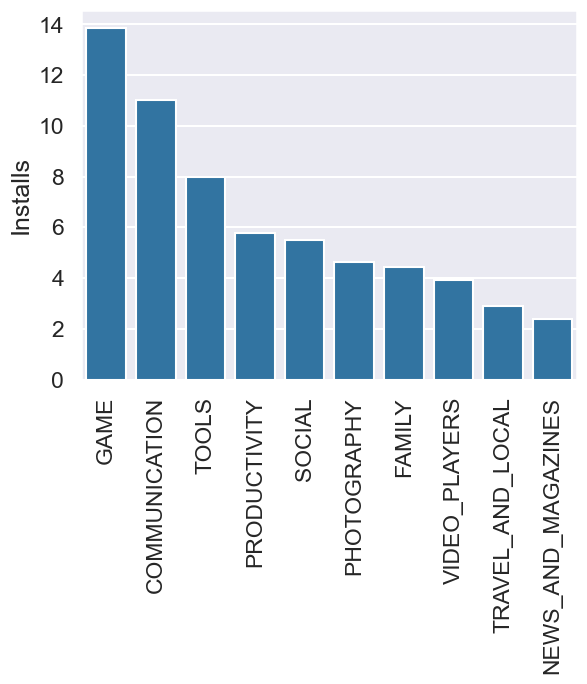

In [149]:
sns.barplot(x=d1.Category.values[:10],y=d1.Installs[:10])
plt.xticks(rotation=90)
plt.show()

In [144]:
d1.Category.values[:10]

array(['GAME', 'COMMUNICATION', 'TOOLS', 'PRODUCTIVITY', 'SOCIAL',
       'PHOTOGRAPHY', 'FAMILY', 'VIDEO_PLAYERS', 'TRAVEL_AND_LOCAL',
       'NEWS_AND_MAGAZINES'], dtype=object)

In [152]:
df[df['Rating']==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Month,Date,Year
293,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,2.0,4.0.3 and up,6,26,2018
511,American Girls Mobile Numbers,DATING,5.0,5,4.4,1000,Free,0.0,Mature 17+,Dating,3.0,4.0.3 and up,7,17,2018
514,Awake Dating,DATING,5.0,2,70000.0,100,Free,0.0,Mature 17+,Dating,2.2.9,4.4 and up,7,24,2018
532,Spine- The dating app,DATING,5.0,5,9.3,500,Free,0.0,Teen,Dating,4.0,4.0.3 and up,7,14,2018
535,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0,100,Free,0.0,Mature 17+,Dating,8.2,4.0.3 and up,8,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9542,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100,Free,0.0,Everyone,Arcade,2.5a,4.1 and up,6,19,2017
9562,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9,1000,Free,0.0,Everyone,Lifestyle,0.7.1,4.4 and up,12,31,2017
9594,Monster Ride Pro,GAME,5.0,1,24000.0,10,Free,0.0,Everyone,Racing,2.0,2.3 and up,3,5,2018
9638,Fr. Daoud Lamei,FAMILY,5.0,22,8.6,1000,Free,0.0,Teen,Education,3.8.0,4.1 and up,6,27,2018
